In [1]:
import pandas as pd

"""
header = 0 은 파일의 첫번째 줄에 열 이름이 있음을 나타내며
delimiter = \t 는 필드가 탭으로 구분되는 것을 의미한다.
quoting = 3 은 쌍따옴표를 무시하도록 한다.((그대로 가져온다?)->빼면 리뷰에서 쌍따옴표 빠짐)
"""

train = pd.read_csv("C:/Users/hyun/Downloads/labeledTrainData.tsv/labeledTrainData.tsv", header = 0, delimiter = '\t', quoting = 3)

test = pd.read_csv("C:/Users/hyun/Downloads/testData.tsv/testData.tsv", header = 0, delimiter = '\t', quoting = 3)

train.shape

C:\Users\hyun\AppData\Local\Temp\ipykernel_23828\428563556.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


(25000, 3)

In [2]:
train.head()

,id,sentiment,review
0,"""5814_8""",1,"""With all this stuff going down at the moment ..."
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ..."
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell..."
3,"""3630_4""",0,"""It must be assumed that those who praised thi..."
4,"""9495_8""",1,"""Superbly trashy and wondrously unpretentious ..."


In [3]:
train.tail()

,id,sentiment,review
24995,"""3453_3""",0,"""It seems like more consideration has gone int..."
24996,"""5064_1""",0,"""I don't believe they made this film. Complete..."
24997,"""10905_3""",0,"""Guy is a loser. Can't get girls, needs to bui..."
24998,"""10194_3""",0,"""This 30 minute documentary Buñuel made in the..."
24999,"""8478_8""",1,"""I saw this movie as a child and it broke my h..."


In [4]:
test.shape

(25000, 2)

In [5]:
test.head()

,id,review
0,"""12311_10""","""Naturally in a film who's main themes are of ..."
1,"""8348_2""","""This movie is a disaster within a disaster fi..."
2,"""5828_4""","""All in all, this is a movie for kids. We saw ..."
3,"""7186_2""","""Afraid of the Dark left me with the impressio..."
4,"""12128_7""","""A very accurate depiction of small time mob l..."


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         25000 non-null  object
 1   sentiment  25000 non-null  int64 
 2   review     25000 non-null  object
dtypes: int64(1), object(2)
memory usage: 586.1+ KB


In [7]:
train.describe()

,sentiment
count,25000.00000
mean,0.50000
std,0.50001
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


In [8]:
train['sentiment'].value_counts()

sentiment
1    12500
0    12500
Name: count, dtype: int64

In [9]:
## pandas로 데이터를 부른 후엔 head, tail, info, describe, shape 5가지로 데이터 살펴봐야함

In [10]:
# html 태그가 섞여있음을 확인할 수 있음

train['review'][0][:700]

'"With all this stuff going down at the moment with MJ i\'ve started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ\'s feeling towards the press and also the obvious message of drugs are bad m\'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely lik'

In [11]:
from bs4 import BeautifulSoup

In [12]:
examplel = BeautifulSoup(train['review'][0], "html5lib")
print(train['review'][0][:700])
examplel.get_text()[:700]

"With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely lik


'"With all this stuff going down at the moment with MJ i\'ve started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ\'s feeling towards the press and also the obvious message of drugs are bad m\'kay.Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyw'

In [13]:
import re
# re.sub의 예시
pattern = re.compile('고양이')
re.sub(pattern, '강아지', '고양이 짱 귀여워')

'강아지 짱 귀여워'

In [14]:
# pattern 인자를 그냥 바로 넣어줘도 됨. 여기서 첫 번째 인자가 target, 두 번째 인자는 바꾸려고 하는 값, 세 번째 인자는 전체 문장
re.sub('고양이', '강아지', '고양이 짱 귀여워')

'강아지 짱 귀여워'

In [15]:
# 소문자와 대문자가 아닌 것은 공백으로 대체한다.
# [^ a ] ; a를 제외하라는 정규표현식 ^ 은 not 의미
letters_only = re.sub('[^a-zA-Z]', ' ', examplel.get_text())
letters_only

' With all this stuff going down at the moment with MJ i ve started listening to his music  watching the odd documentary here and there  watched The Wiz and watched Moonwalker again  Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent  Moonwalker is part biography  part feature film which i remember going to see at the cinema when it was originally released  Some of it has subtle messages about MJ s feeling towards the press and also the obvious message of drugs are bad m kay Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring  Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him The actual feature film bit when it finally starts is only on for    m

In [16]:
#대소문자를 다르게 인식할 수 있으므로 모두 소문자로 바꿔줍니다.
lower_case = letters_only.lower()

words = lower_case.split()
print(len(words))
words[:10]

437


['with',
 'all',
 'this',
 'stuff',
 'going',
 'down',
 'at',
 'the',
 'moment',
 'with']

In [17]:
# 불용어 처리

import nltk
from nltk.corpus import stopwords
stopwords.words('english')[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [18]:
# 불용어 제거

words = [ w for w in words if not w in stopwords.words('english')]
print(len(words))
words[:10]

219


['stuff',
 'going',
 'moment',
 'mj',
 'started',
 'listening',
 'music',
 'watching',
 'odd',
 'documentary']

In [19]:
# 포터 스테머
stemmer = nltk.stem.PorterStemmer()

print(stemmer.stem('maximum'))
print("The stemmed form of running is: {}".format(stemmer.stem("running")))
print("The stemmed form of runs is: {}".format(stemmer.stem("runs")))
print("The stemmed form of run is: {}".format(stemmer.stem("run")))

maximum
The stemmed form of running is: run
The stemmed form of runs is: run
The stemmed form of run is: run


In [20]:
# 랭커스터 스태머의 사용 예
from nltk.stem.lancaster import LancasterStemmer
lancaster_stemmer = LancasterStemmer()
print(lancaster_stemmer.stem('maximum'))
print("The stemmed form of running is: {}".format(lancaster_stemmer.stem("running")))
print("The stemmed form of runs is: {}".format(lancaster_stemmer.stem("runs")))
print("The stemmed form of run is: {}".format(lancaster_stemmer.stem("run")))

maxim
The stemmed form of running is: run
The stemmed form of runs is: run
The stemmed form of run is: run


In [21]:
# 처리 전 단어
words[:10]

['stuff',
 'going',
 'moment',
 'mj',
 'started',
 'listening',
 'music',
 'watching',
 'odd',
 'documentary']

In [22]:
from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer('english') # snowballstemmer는 어떤 언어를 할 지 첫 번째 인자에서 정해줘야 함
words = [stemmer.stem(w) for w in words]
words[:10]

['stuff',
 'go',
 'moment',
 'mj',
 'start',
 'listen',
 'music',
 'watch',
 'odd',
 'documentari']

In [23]:
def review_to_words(raw_review):
    # 1. HTML 제거
    review_text = BeautifulSoup(raw_review, 'html.parser').get_text()
    # 2. 영문자가 아닌 문자는 공백으로 변환
    letters_only = re.sub('[^a-zA-Z]', ' ', review_text)
    # 3. 소문자 변환
    words = letters_only.lower().split()
    # 4. 파이썬에서는 리스트보다 세트로 찾는 게 훨씬 빠르다.
    # stopwords 를 세트로 변환한다.
    stops = set(stopwords.words('english'))
    # 5. Stopwords 불용어 제거
    meaningful_words = [w for w in words if not w in stops]
    # 6. 어간추출
    stemming_words = [stemmer.stem(w) for w in meaningful_words]
    # 7. 공백으로 구문된 문자열로 결합하여 결과를 반환
    return(' '.join(stemming_words))

In [24]:
clean_review = review_to_words(train['review'][0])
clean_review

'stuff go moment mj start listen music watch odd documentari watch wiz watch moonwalk mayb want get certain insight guy thought realli cool eighti mayb make mind whether guilti innoc moonwalk part biographi part featur film rememb go see cinema origin releas subtl messag mj feel toward press also obvious messag drug bad kay visual impress cours michael jackson unless remot like mj anyway go hate find bore may call mj egotist consent make movi mj fan would say made fan true realli nice actual featur film bit final start minut exclud smooth crimin sequenc joe pesci convinc psychopath power drug lord want mj dead bad beyond mj overheard plan nah joe pesci charact rant want peopl know suppli drug etc dunno mayb hate mj music lot cool thing like mj turn car robot whole speed demon sequenc also director must patienc saint came film kiddi bad sequenc usual director hate work one kid let alon whole bunch perform complex danc scene bottom line movi peopl like mj one level anoth think peopl stay

In [25]:
num_reviews = train['review'].size
num_reviews

25000

In [27]:
clean_train_reviews = []
for i in range(0, num_reviews):
    # if the index is only evnely divisivle by 5000, print a message
    if (i+1)%5000==0:
        print('Review {} of {}'.format(i+1, num_reviews))
    clean_train_reviews.append(review_to_words(train['review'][i]))

##### xrange가 없어져서 range로 대체(파이썬 3부터 range가 내부에서 xrange로 작동)

C:\Users\hyun\AppData\Local\Temp\ipykernel_23828\1350887889.py:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  review_text = BeautifulSoup(raw_review, 'html.parser').get_text()


Review 5000 of 25000
Review 10000 of 25000
Review 15000 of 25000
Review 20000 of 25000
Review 25000 of 25000


In [28]:
%time train['review_clean'] = train['review'].apply(review_to_words)

C:\Users\hyun\AppData\Local\Temp\ipykernel_23828\1350887889.py:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  review_text = BeautifulSoup(raw_review, 'html.parser').get_text()


CPU times: total: 56.7 s
Wall time: 57 s


In [29]:
# 단어 수
count_words_f = lambda x: len(str(x).split())
train['num_words'] = list(map(count_words_f, clean_train_reviews))
# 중복을 제거한 단어 수
count_uniq_words_f = lambda x: len(set(str(x).split()))
train['num_uniq_words'] = list(map(count_uniq_words_f, clean_train_reviews))

In [30]:
test['num_uniq_words'] = list(map(count_uniq_words_f, clean_train_reviews))

In [31]:
# 위의 함수에 대한 이해를 위해 첫 번째 리뷰로 돌아가는 모습 체크

x = clean_train_reviews[0]
x = str(x).split()
print(len(x))
x[:10]

219


['stuff',
 'go',
 'moment',
 'mj',
 'start',
 'listen',
 'music',
 'watch',
 'odd',
 'documentari']

리뷰별 단어 평균 값 : 119.52356
리뷰별 단어 중간 값 : 89.0


C:\Users\hyun\AppData\Local\Temp\ipykernel_23828\4097707399.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['num_words'], bins=100, ax=axes[0])


리뷰별 고유 단어 평균 값 : 94.05756
리뷰별 고유 단어 중간 값 : 74.0


C:\Users\hyun\AppData\Local\Temp\ipykernel_23828\4097707399.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['num_uniq_words'], bins=100, color='g', ax=axes[1])


Text(0.5, 1.0, '리뷰별 단어 수 분포')

C:\Users\hyun\Anaconda3\envs\torch_book\lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 47532 (\N{HANGUL SYLLABLE RI}) missing from current font.
  func(*args, **kwargs)
C:\Users\hyun\Anaconda3\envs\torch_book\lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 48624 (\N{HANGUL SYLLABLE BYU}) missing from current font.
  func(*args, **kwargs)
C:\Users\hyun\Anaconda3\envs\torch_book\lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  func(*args, **kwargs)
C:\Users\hyun\Anaconda3\envs\torch_book\lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 45800 (\N{HANGUL SYLLABLE DAN}) missing from current font.
  func(*args, **kwargs)
C:\Users\hyun\Anaconda3\envs\torch_book\lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 50612 (\N{HANGUL SYLLABLE EO}) missing from current font.
  func(*args, **kwargs)
C:\Users\hyun\Anaconda3\envs\torch_book\lib\site-packages\IPython

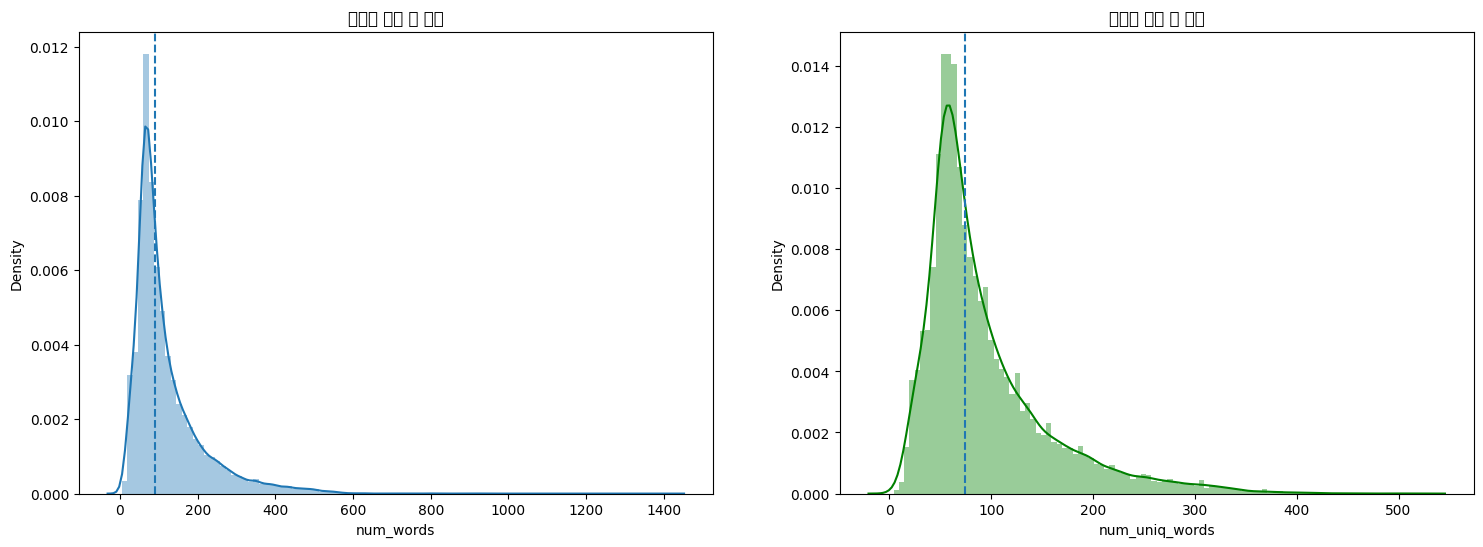

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(ncols=2)
fig.set_size_inches(18,6)
print('리뷰별 단어 평균 값 :', train['num_words'].mean())
print('리뷰별 단어 중간 값 :', train['num_words'].median())
sns.distplot(train['num_words'], bins=100, ax=axes[0])
axes[0].axvline(train['num_words'].median(), linestyle='dashed')
axes[0].set_title('리뷰별 단어 수 분포')

print('리뷰별 고유 단어 평균 값 :', train['num_uniq_words'].mean())
print('리뷰별 고유 단어 중간 값 :', train['num_uniq_words'].median())
sns.distplot(train['num_uniq_words'], bins=100, color='g', ax=axes[1])
axes[1].axvline(train['num_uniq_words'].median(), linestyle='dashed')
axes[1].set_title('리뷰별 단어 수 분포')


In [33]:
# bag of words
from sklearn.feature_extraction.text import CountVectorizer

# 튜토리얼과 다르게 파라미터 값 수정
# 파라미터 값만 수정해도 차이가 많이 남
vectorizer = CountVectorizer(analyzer = 'word',
                             tokenizer = None,
                             preprocessor = None,
                             stop_words = None,
                             min_df = 2, #토큰이 나타날 최소 문서 개수
                             ngram_range=(1, 3),
                             max_features = 20000
                            )
vectorizer

CountVectorizer(max_features=20000, min_df=2, ngram_range=(1, 3))

In [34]:
# fit_transform() 는 두 가지 작용을 함
# 첫 번째, 모델에 맞춰 단어 배우기
# 두 번째, training data를 feature vector로 바꾸기
# fit_transform에 대한 input은 리스트 형태의 문자열이어야함

train_data_features = vectorizer.fit_transform(clean_train_reviews)

# Numpy array가 작업하기 쉬우니, 결과를 array로 바꿔줌

train_data_features = train_data_features.toarray()

train_data_features.shape

(25000, 20000)

In [42]:
# Take a look at the words in the vocabulary
vocab = vectorizer.get_feature_names_out()
vocab

##### countvectorizer에 get_feature_names()가 없다고해서 get_feature_names_out으로 바꿔줌
##### +추가+ 인터넷 검색해봤을때 get_feature_names_out 으로만 나와서 그렇게 썼는데 아래 문단 오류남
##### 오류 코드: TypeError: 'method' object is not iterable
##### 함수에 ()를 안써주고 호출해서 vocab 변수 자체가 함수가 되어버림 그래서 method가 iterable 하지 않다고 뜬 것!

array(['aag', 'aaron', 'ab', ..., 'zorro', 'zu', 'zucker'], dtype=object)

In [43]:
import numpy as np

# Sum up the counts of each vocabulary word
dist = np.sum(train_data_features, axis=0)

# For each, print the vocabilary word and the number of times it
# appears in the training set
for tag, count in zip(vocab, dist):
    print (count, tag)

26 aag
48 aaron
22 ab
288 abandon
24 abbey
30 abbi
29 abbot
30 abbott
125 abc
55 abduct
24 abe
28 abhay
28 abid
26 abigail
562 abil
25 abil make
1259 abl
53 abl get
32 abl make
54 abl see
35 abl watch
27 abli
37 aboard
83 abomin
69 aborigin
92 abort
63 abound
93 abraham
29 abraham lincoln
38 abroad
136 abrupt
118 absenc
83 absent
1850 absolut
29 absolut aw
35 absolut brilliant
42 absolut hilari
23 absolut horribl
93 absolut love
154 absolut noth
29 absolut perfect
23 absolut reason
29 absolut sens
22 absolut stun
30 absolut terribl
50 absolut worst
154 absorb
49 abstract
427 absurd
40 abu
73 abund
398 abus
110 abysm
41 academ
298 academi
172 academi award
24 academi award best
704 accent
30 accentu
781 accept
165 access
344 accid
246 accident
34 accident kill
118 acclaim
26 accolad
24 accommod
197 accompani
28 accomplic
271 accomplish
329 accord
297 account
349 accur
23 accur portray
82 accuraci
204 accus
30 accus murder
24 accustom
75 ace
50 ach
578 achiev
28 achill
102 acid
109 ackno

In [45]:
print ("Training the random forest...")
from sklearn.ensemble import RandomForestClassifier

# Initialize a Random Forest classifier with 100 trees
forest = RandomForestClassifier(n_estimators = 100)

# Fit the forest to the training set, using the bag of words as
# features and the sentiment labels as the response variable
#
# This may take a few minutes to run
forest = forest.fit(train_data_features, train["sentiment"])

Training the random forest...


In [51]:
# Read the test data
test = pd.read_csv("C:/Users/hyun/Downloads/testData.tsv/testData.tsv", header=0, delimiter="\t", quoting=3)

# Verify that there are 25000 rows and 2 columns
print (test.shape)

# Create an empty list and append the clean reviews one by one
num_reviews = len(test["review"])
clean_test_reviews = []

print ("Cleaning and parsing the test set movie reviews...\n")
for i in range(0, num_reviews):
    if((i+1)% 1000==0):        
        print("Review %d of %d" % (i+1, num_reviews))
    clean_review = review_to_words(test["review"][i])
    clean_test_reviews.append(clean_review)

# Get a bag of words for the test set, and convert to a numpy array
test_data_features = vectorizer.transform(clean_test_reviews)
test_data_features = test_data_features.toarray()

# Use the random forest to make sentiment label predictions
result = forest.predict(test_data_features)

# Copy the results to a pandas dataframe with an "id" column and a "sentiment" column
output = pd.DataFrame(data={"id":test["id"], "sentiment":result})

# Use pandas to write the comma-separated output file
output.to_csv("Bag_of_Words_model.csv", index=False, quoting=3)

(25000, 2)
Cleaning and parsing the test set movie reviews...



C:\Users\hyun\AppData\Local\Temp\ipykernel_23828\1350887889.py:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  review_text = BeautifulSoup(raw_review, 'html.parser').get_text()


Review 1000 of 25000
Review 2000 of 25000
Review 3000 of 25000
Review 4000 of 25000
Review 5000 of 25000
Review 6000 of 25000
Review 7000 of 25000
Review 8000 of 25000
Review 9000 of 25000
Review 10000 of 25000
Review 11000 of 25000
Review 12000 of 25000
Review 13000 of 25000
Review 14000 of 25000
Review 15000 of 25000
Review 16000 of 25000
Review 17000 of 25000
Review 18000 of 25000
Review 19000 of 25000
Review 20000 of 25000
Review 21000 of 25000
Review 22000 of 25000
Review 23000 of 25000
Review 24000 of 25000
Review 25000 of 25000
